# My First Machine Learning Program

## Introduction
There is no better way to learn Machine Learning than to experiment with it! In this notebook you are step by step guided to do this. Challenge yourself in trying to understand the code and try to change the parameters.


First things first, we need a few libraries.

In [51]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.19.2
pandas version: 1.1.3
scikit-learn version: 0.23.2
matplotlib version: 3.3.2


The algorithm you are going to use is known as k-NN (k-Nearest Neighbors) classification.

#### DIY
In Canvas more information is provided about kNN. Read through it and write down how you think the learning works.

## The supervised learning classification steps: overview

This notebook implements all specific tasks in applying supervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Dividing your data into a training and test set, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm 
* and Evaluating its results.

You will learn more on how to do each task in the weeks to come. For now, try to read the code and experiment with it.

## Step 1 Preparing the data
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected a popular dataset for you that is suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 

#### DIY
Take a look at the website https://archive.ics.uci.edu/ml/datasets.html and find these datasets there. What information or metadata is available? List resources that explain the content of these dataset and that used these datasets to test learning algorithmns.

### Downloading

In [52]:
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

### Exploring the iris dataset

In [53]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Analysing and visualising the data & cleaning the data

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N. N (# rows) represents the number of data points or entries, M (# columns) represents the number of features. If necessary, textual information should be removed or transformed into numerical data. 

#### DIY
Take a look at the topics we'll discuss next weeks. When will we take about visualisation? When will we discuss data cleaning?

#### Iris dataset

In [54]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species-id
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


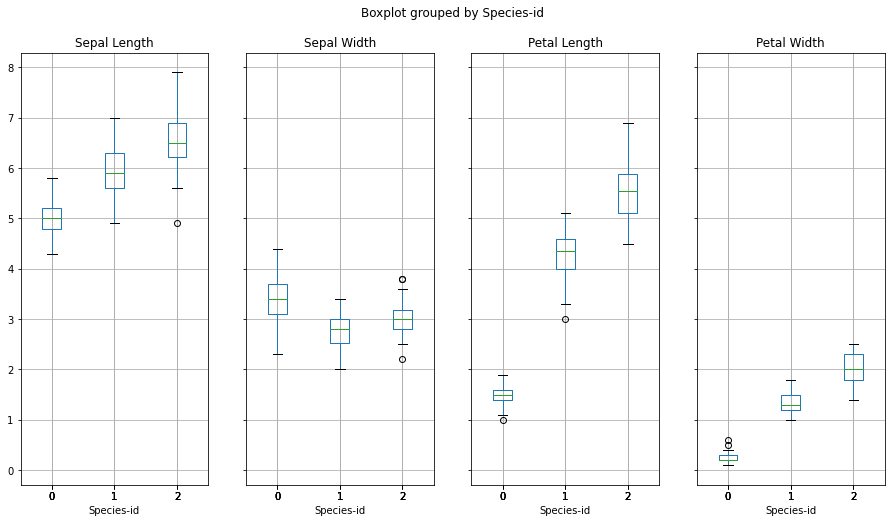

In [55]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,8), layout=(1,4));

## Selecting features (and scaling them)
We will scale each feature (linearly) between 0 and 10.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#### Iris dataset - step 3

Iris types: [0 1 2]
The length of X_iris: 149


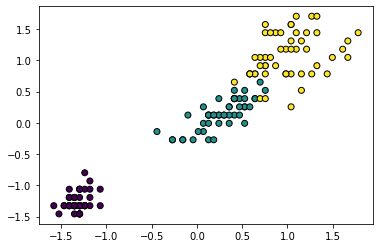

In [57]:
# Define X_iris and y_iris
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

## Dividing your data into a training and test set

Let’s use the symbol X for the scaled 2D input feature array, and the symbol y for the 1D output label vector.
We will split the data into a train set and test set.

#### Iris dataset

Train shape: (111, 2) (111,)
Test shape: (38, 2) (38,)


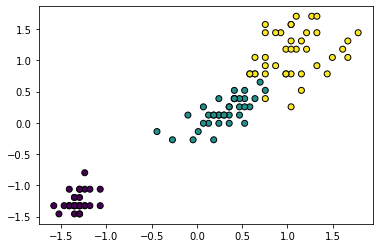

In [58]:
# Split in train and test sets
#X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25, stratify=y_iris)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)
print('Train shape:', X_train_iris.shape, y_train_iris.shape)
print('Test shape:', X_test_iris.shape, y_test_iris.shape)

plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

## Training your Machine learning algorithm

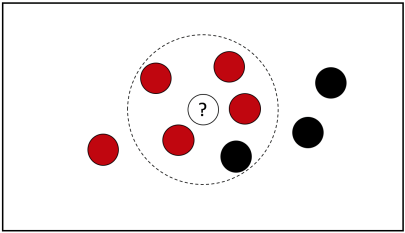
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [59]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

We create a function that takes the features and labels of the data as parameters, as the number of neighbors. We next predict the class for all possible values in the two dimensions. These results are plotted, visualising the decision boundaries between predicted classes.

In [60]:
def plot_nearest_neighbors(X_train, X_test, Y_train, Y_test, k, classlabels, featurelabels, weight):
    print('Number of training points: ',X_train.size)
    print('Number of training points: ',X_train.shape)
    possible_classes = Y_train.unique()
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    
    nb_of_classes = classlabels.unique().size
    
    h = .02  # step size in the mesh

    ## Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ## we create an instance of Neighbours Classifier and fit the data.
    clf_data = KNeighborsClassifier(k, weights=weight)
    clf_data.fit(X_train, Y_train)

    ## Plot the decision boundary. For that, we will assign a color to each
    ## possible point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z_data = clf_data.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z_data = Z_data.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z_data, cmap=cmap_light, shading='auto')

    ## Plot also the training points
    #print(Y_train)
    #print(X_train[0])

    for i in possible_classes:
        x1s_data = X_train[:, 0][Y_train.values == i]
        x2s_data = X_train[:, 1][Y_train.values == i]
        plt.scatter(x1s_data, x2s_data, cmap=cmap_bold, edgecolors='k', label=i)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-Class classification (k = %i, weights = '%s')" % (nb_of_classes, k, weight))
    plt.xlabel(featurelabels[0])
    plt.ylabel(featurelabels[1])
    plt.legend()
    plt.show()
        
    return clf_data         

#### Plotting the decision boundary for the Iris dataset

Number of training points:  222
Number of training points:  (111, 2)


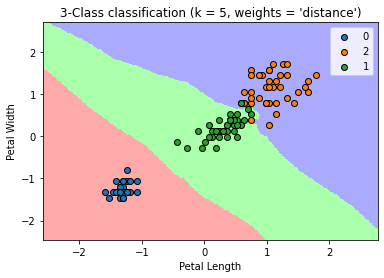

In [61]:
clf_iris = plot_nearest_neighbors(X_train_iris, X_test_iris, y_train_iris, y_test_iris, 5, df_iris.Species, ['Petal Length', 'Petal Width'], 'distance')

### Step 6 - Result of learning: accuracy
The accuracy of your KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [62]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [63]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

0.9210526315789473

In [64]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_iris, y_pred_iris, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        16
     class 1       0.79      1.00      0.88        11
     class 2       1.00      0.73      0.84        11

    accuracy                           0.92        38
   macro avg       0.93      0.91      0.91        38
weighted avg       0.94      0.92      0.92        38



Confusion matrix, without normalization
[[16  0  0]
 [ 0 11  0]
 [ 0  3  8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.27272727 0.72727273]]


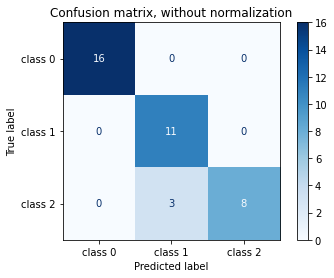

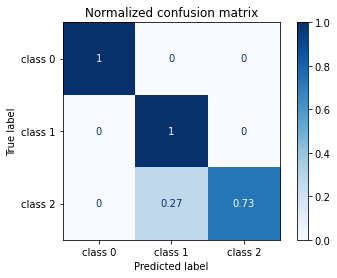

In [65]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_iris, X_test_iris, y_test_iris,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()